In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB

In [ ]:
data=pd.read_csv("/content/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
x=data.iloc[:,3]
y=data.iloc[:,-1]
data.shape


(400, 5)

In [ ]:
splits=4
#a list of lists storing the split data
split_data = np.array_split(data,splits)

In [ ]:
# here we convert the splits into dataframes
df1 = pd.DataFrame(split_data[0])
df2 = pd.DataFrame(split_data[1])
df3 = pd.DataFrame(split_data[2])
df4 = pd.DataFrame(split_data[3])

In [ ]:
df4.shape

(100, 5)

In [ ]:
class LogisticRegression:
  def __init__(self,learning_rate=0.01,epochs=1000):
    self.weight = np.zeros(9)
    self.bias = None
    self.learning_rate = learning_rate
    self.epochs = epochs
  def fit(self, X_train, y_train):
    num = 0
    den = 0
    for i in range(X_train.shape[0]):
      num = num + (X_train[i]-X_train.mean())*(y_train[i]-y_train.mean())
      den = den + (X_train[i]-X_train.mean())*(X_train[i]-X_train.mean())
    self.weight = num/den
    self.bias = y_train.mean()-(self.weight*X_train.mean())
  def predict(self,X_test):
    return (self.weight*X_test + self.bias)
  def getWeight(self):
    return self.weight
  def getBias(self):
    return self.bias
  def setWeight(self, new_weight):
    self.weight = new_weight
  def setBias(self, new_intercept):
    self.bias = new_intercept

**Client1**

In [ ]:
X1 = df1.iloc[:,3].values
y1 = df1.iloc[:,-1].values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=2)
SLR1 = LogisticRegression()
SLR1.fit(X_train1, y_train1)
y_pred1 = SLR1.predict(X_test1)

In [ ]:
mse1 = mean_squared_error(y_pred1, y_test1)
print("Mean Squared Error: ", mse1)

Mean Squared Error:  0.2219331756026391


In [ ]:
weight1 = SLR1.getWeight()
bias1 = SLR1.getBias()

**Client2**

In [ ]:
X2 = df2.iloc[:,3].values
y2 = df2.iloc[:,-1].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=2)
SLR2 = LogisticRegression()
SLR2.fit(X_train2,y_train2)
y_pred2 = SLR2.predict(X_test2)
mse2 = mean_squared_error(y_pred2, y_test2)
print("Mean Squared Error: ", mse2)

Mean Squared Error:  0.025701284263813007


In [ ]:
weight2 = SLR1.getWeight()
bias2 = SLR1.getBias()

**Client3**

In [ ]:
X3 = df3.iloc[:,3].values
y3 = df3.iloc[:,-1].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=2)
SLR3 = LogisticRegression()
SLR3.fit(X_train3, y_train3)
y_pred3 = SLR3.predict(X_test3)

In [ ]:
mse3 = mean_squared_error(y_pred3, y_test3)
print("Mean Squared Error: ", mse3)

Mean Squared Error:  0.20835461402898697


In [ ]:
weight3 = SLR1.getWeight()
bias3 = SLR1.getBias()

**Client4**

In [ ]:
X4 = df4.iloc[:,3].values
y4 = df4.iloc[:,-1].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=2)
SLR4 = LogisticRegression()
SLR4.fit(X_train4, y_train4)
y_pred4 = SLR4.predict(X_test4)

In [ ]:
mse4 = mean_squared_error(y_pred4, y_test4)
print("Mean Squared Error: ", mse4)

Mean Squared Error:  0.20869975771345964


In [ ]:
weight4 = SLR1.getWeight()
bias4 = SLR1.getBias()

In [ ]:
weights = [weight1, weight2, weight3, weight4]
biases = [bias1, bias2, bias3, bias4]
print(weights)
print(biases)

[2.520005353182733e-06, 2.520005353182733e-06, 2.520005353182733e-06, 2.520005353182733e-06]
[0.02083867251904631, 0.02083867251904631, 0.02083867251904631, 0.02083867251904631]


In [ ]:
avg_weight = sum(weights)/len(weights)
avg_bias = sum(biases)/len(biases)

In [ ]:
print("Average Weight: ", avg_weight)
print("Average Bias: ", avg_bias)

Average Weight:  2.520005353182733e-06
Average Bias:  0.02083867251904631


In [ ]:
SLR1.setWeight(avg_weight)
SLR1.setBias(avg_bias)

In [ ]:
SLR2.setWeight(avg_weight)
SLR2.setBias(avg_bias)

In [ ]:
SLR3.setWeight(avg_weight)
SLR3.setBias(avg_bias)

In [ ]:
SLR4.setWeight(avg_weight)
SLR4.setBias(avg_bias)

In [ ]:
y_pred1 = SLR1.predict(X_test1)
mse1 = mean_squared_error(y_test1, y_pred1)
print("Mean Squared Error:", mse1)

Mean Squared Error: 0.2219331756026391


In [ ]:
y_pred2 = SLR2.predict(X_test2)
mse2 = mean_squared_error(y_test2, y_pred2)
print("Mean Squared Error:", mse2)

Mean Squared Error: 0.047101591284700296


In [ ]:
y_pred3 = SLR3.predict(X_test3)
mse3 = mean_squared_error(y_test3, y_pred3)
print("Mean Squared Error:", mse3)

Mean Squared Error: 0.3220247177115309


In [ ]:
y_pred4 = SLR4.predict(X_test4)
mse4 = mean_squared_error(y_test4, y_pred4)
print("Mean Squared Error:", mse4)

Mean Squared Error: 0.5155177707040781


In [ ]:
SLR1.fit(X_train1, y_train1)
SLR2.fit(X_train2, y_train2)
SLR3.fit(X_train3, y_train3)
SLR4.fit(X_train4, y_train4)

In [ ]:
y_pred1 = SLR1.predict(X_test1)

In [ ]:
mse1 = mean_squared_error(y_test1, y_pred1)
print("Mean Squared Error:", mse1)

Mean Squared Error: 0.2219331756026391


In [ ]:
y_pred2 = SLR2.predict(X_test2)

In [ ]:
mse2 = mean_squared_error(y_test2, y_pred2)
print("Mean Squared Error:", mse2)

Mean Squared Error: 0.025701284263813007


In [ ]:
y_pred3 = SLR3.predict(X_test3)

In [ ]:
mse3 = mean_squared_error(y_test3, y_pred3)
print("Mean Squared Error:", mse3)

Mean Squared Error: 0.20835461402898697


In [ ]:
y_pred4 = SLR4.predict(X_test4)

In [ ]:
mse4 = mean_squared_error(y_test4, y_pred4)
print("Mean Squared Error:", mse4)

Mean Squared Error: 0.20869975771345964


Naive_bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

iris = pd.read_csv("/content/Social_Network_Ads.csv")
selected_columns = ['Age', 'EstimatedSalary']

In [ ]:
iris.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
X = iris[selected_columns].values
y = iris['Purchased'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

naive_bayes_classifier = GaussianNB()

naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the testing set
predictions = naive_bayes_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.925


In [1]:
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/Social_Network_Ads.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:

data = pd.read_csv('/content/Social_Network_Ads.csv')
print ("Data shape {}".format(data.shape))

Data shape (400, 5)


In [3]:
data = data[["Age","EstimatedSalary","Purchased"]]

In [4]:
purchased_data = data[["Age","EstimatedSalary","Purchased"]][data["Purchased"]==1]
purchased_data

,Age,EstimatedSalary,Purchased
7,32,150000,1
16,47,25000,1
17,45,26000,1
18,46,28000,1
19,48,29000,1
...,...,...,...
393,60,42000,1
395,46,41000,1
396,51,23000,1
397,50,20000,1


In [5]:
not_purchased_data = data[["Age","EstimatedSalary","Purchased"]][data["Purchased"]==0]
not_purchased_data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
377,42,53000,0
380,42,64000,0
387,39,71000,0
394,39,59000,0


In [6]:
import matplotlib.pyplot as plt

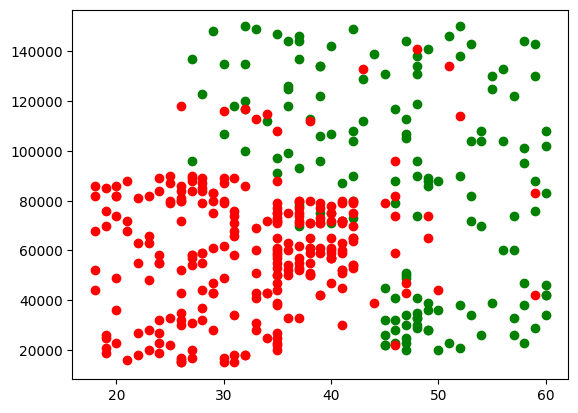

In [7]:
plt.scatter(purchased_data["Age"],purchased_data["EstimatedSalary"],c="green")
plt.scatter(not_purchased_data["Age"],not_purchased_data["EstimatedSalary"],c="red")

In [8]:
X = data[["Age","EstimatedSalary"]].values
y = data["Purchased"]

In [10]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
cls = KNeighborsClassifier(n_neighbors= 7)

In [13]:
cls.fit(X, y)

KNeighborsClassifier(n_neighbors=7)

In [14]:
cls.predict([[40,130000]])

array([1])

In [15]:
cls.predict_proba([[40,130000]])

array([[0.14285714, 0.85714286]])

DeepLearningTechnique

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import torch.optim as optim
from torch.utils.data import DataLoader

In [17]:
df = pd.read_csv('/content/Social_Network_Ads.csv', encoding='utf8', sep = ',', low_memory = False)

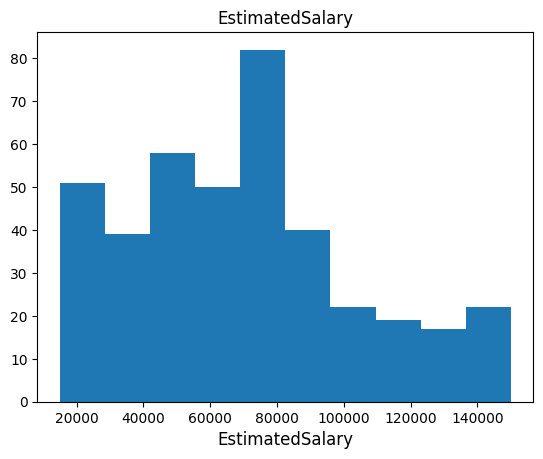

In [18]:
plt.hist(df['EstimatedSalary'])
plt.title("EstimatedSalary", size = 12)
plt.xlabel("EstimatedSalary", size = 12)
plt.show()

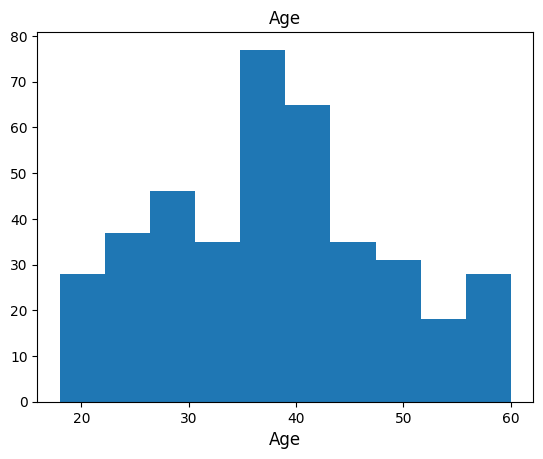

In [19]:
plt.hist(df['Age'])
plt.title("Age", size = 12)
plt.xlabel("Age", size = 12)
plt.show()

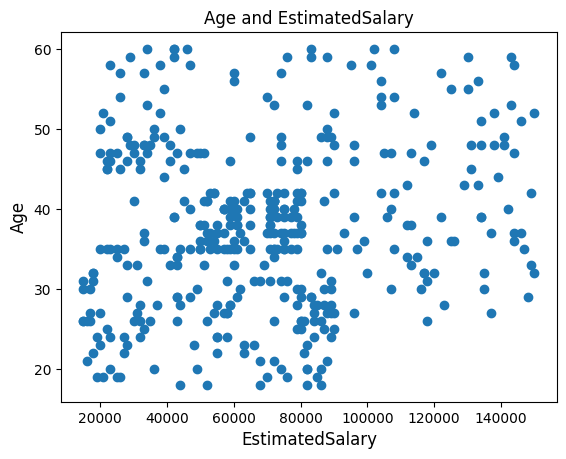

In [20]:
plt.title("Age and EstimatedSalary", size = 12)
plt.ylabel("Age", size = 12)
plt.xlabel("EstimatedSalary", size = 12)
plt.plot(df['EstimatedSalary'], df['Age'], 'o')
plt.show()

In [21]:
column_name = 'User ID'
if column_name in df.columns:
    df = df.drop('User ID', axis='columns')

df['Gender'] = df['Gender'].replace(to_replace = ['Male', 'Female'], value = [0, 1])

In [22]:
df = df.drop(df[df['Age'] == 0].index)

In [23]:
scaler = MinMaxScaler()
cols_to_scale = ['EstimatedSalary','Age']
df_scaled = pd.DataFrame(scaler.fit_transform(df[cols_to_scale]), columns = cols_to_scale)
df[cols_to_scale] = df_scaled

ANN

In [24]:
targets_numpy = df.Purchased.values
features_numpy = df.loc[:,df.columns != "Purchased"].values

features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42)
X_train = torch.from_numpy(features_train).type(torch.FloatTensor)
Y_train = torch.from_numpy(targets_train).type(torch.FloatTensor)

X_test = torch.from_numpy(features_test).type(torch.FloatTensor)
Y_test = torch.from_numpy(targets_test).type(torch.FloatTensor)

train = torch.utils.data.TensorDataset(X_train, Y_train)
test = torch.utils.data.TensorDataset(X_test, Y_test)

batch_size = 20

from torch.utils.data import random_split

train_set, val_set = random_split(train, [220, 100])

train_loader = DataLoader(train_set, batch_size = batch_size, shuffle = True)
val_loader = DataLoader(val_set, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

In [25]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()

        self.fc1 = nn.Linear(3, 30)
        nn.BatchNorm1d(30)
        self.fc2 = nn.Linear(30, 30)
        nn.BatchNorm1d(30)
        self.fc3 = nn.Linear(30, 1)

    def forward(self, x):
        # assigning activation functions to layers:
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x

model = SimpleNet()

In [26]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [27]:
class EarlyStopping:
    def __init__(self, tolerance = 5, min_delta = 0):
        self.tolerance = tolerance
        self.min_delta = min_delta
        self.counter = 0
        self.early_stop = False

    def __call__(self, train_loss, val_loss):
        if(val_loss - train_loss) > self.min_delta:
            self.counter += 1
            if self.counter >= self.tolerance:
                self.early_stop = True

stop = EarlyStopping(tolerance = 5, min_delta = 10)

In [28]:
train_loss_list = []
val_loss_list = []
loss_list = []

N_EPOCHS = 1000
for epoch in range(N_EPOCHS):

    # Training
    train_loss = 0.0
    train_list = []
    model.train()
    for inputs, labels in train_loader:

        labels = labels.unsqueeze(1)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_list.append(loss.item())

    loss_list.append(loss.item())

    # Validation
    val_loss = 0.0
    val_list = []
    model.eval()
    for inputs, labels in val_loader:

        labels = labels.unsqueeze(1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        val_loss += loss.item()
        val_list.append(loss.item())
        # val_loss_list.append(loss.data)

    if stop.early_stop:
        epoch_no = epoch
        break

    var = "epoch_no"
    if var in locals():
        pass
    else:
        epoch_no = 1000

    lst = list(range(0, epoch_no + 1, 50))
    lst[0] = 1

    if epoch in lst:
        print("Epoch: {} Train Loss: {} Val Loss: {}".format(epoch, round(train_loss/len(train_loader), 8), round(val_loss/len(val_loader), 8) ))

Epoch: 1 Train Loss: 0.69257128 Val Loss: 0.69469264
Epoch: 50 Train Loss: 0.29537403 Val Loss: 0.30854244
Epoch: 100 Train Loss: 0.24270026 Val Loss: 0.26850822
Epoch: 150 Train Loss: 0.22096418 Val Loss: 0.26244304
Epoch: 200 Train Loss: 0.21507595 Val Loss: 0.27061359
Epoch: 250 Train Loss: 0.209502 Val Loss: 0.2706318
Epoch: 300 Train Loss: 0.204806 Val Loss: 0.27951734
Epoch: 350 Train Loss: 0.20609981 Val Loss: 0.28678592
Epoch: 400 Train Loss: 0.19971745 Val Loss: 0.29211868
Epoch: 450 Train Loss: 0.1989224 Val Loss: 0.30088531
Epoch: 500 Train Loss: 0.19656586 Val Loss: 0.30341566
Epoch: 550 Train Loss: 0.19535493 Val Loss: 0.3049027
Epoch: 600 Train Loss: 0.19228201 Val Loss: 0.31084899
Epoch: 650 Train Loss: 0.19523732 Val Loss: 0.32244605
Epoch: 700 Train Loss: 0.19009998 Val Loss: 0.32342847
Epoch: 750 Train Loss: 0.19117394 Val Loss: 0.32804167
Epoch: 800 Train Loss: 0.1881917 Val Loss: 0.33804212
Epoch: 850 Train Loss: 0.18865833 Val Loss: 0.34059041
Epoch: 900 Train Loss

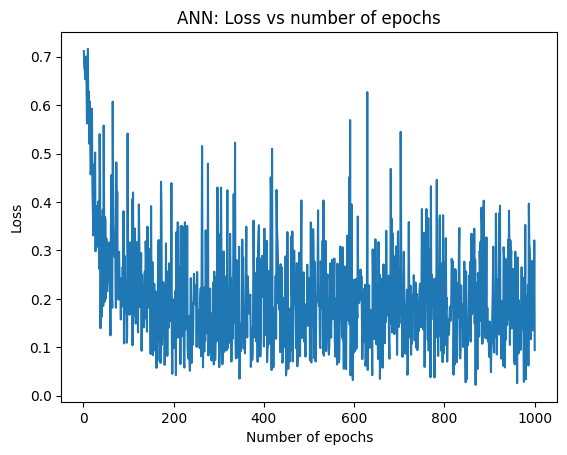

In [29]:
epochs = list(range(1, epoch_no + 1))

plt.plot(epochs, loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("ANN: Loss vs number of epochs")
plt.show()

In [30]:
num_correct = 0.0
for x_test_batch, y_test_batch in test_loader:
    y_pred_batch = model(x_test_batch)
    _, predicted = torch.max(y_pred_batch, 1)
    num_correct += (predicted == y_test_batch).float().sum()

    accuracy = num_correct/(len(test_loader) * test_loader.batch_size)

print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.6499999761581421
